In [8]:
pip install statsmodels


    99% |████████████████████████████████| 9.6MB 8.2MB/s eta 0:00:011████▌              | 5.2MB 8.5MB/s eta 0:00:01    100% |████████████████████████████████| 9.6MB 865kB/s 
    100% |████████████████████████████████| 235kB 8.4MB/s ta 0:00:011
You are using pip version 18.1, however version 23.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install scikit-learn

    100% |████████████████████████████████| 7.9MB 1.7MB/s ta 0:00:011   13% |████▍                           | 1.1MB 5.7MB/s eta 0:00:02    18% |█████▉                          | 1.4MB 2.6MB/s eta 0:00:03
    100% |████████████████████████████████| 307kB 7.2MB/s ta 0:00:011
You are using pip version 18.1, however version 23.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
#import all the  needed libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [3]:
#import the data and view the data you imported 
bike_sharing = pd.read_csv('https://raw.githubusercontent.com/Pelumioluwa/MBAN6110Class/main/Data/bikes_sharing.csv')
bike_sharing

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


The first step is to check if the data is clean. From the below, we can see that the data is clean and there are no missing data. However, we noticed that the datetime data type is object. We would convert this to datetime datatype

Once we completed this, we plotted a scattered plot to visualize the data

In [8]:
#check data information 
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [9]:
#convert datetime from object type to datetime datatype 
bike_sharing['datetime'] = pd.to_datetime(bike_sharing['datetime'])

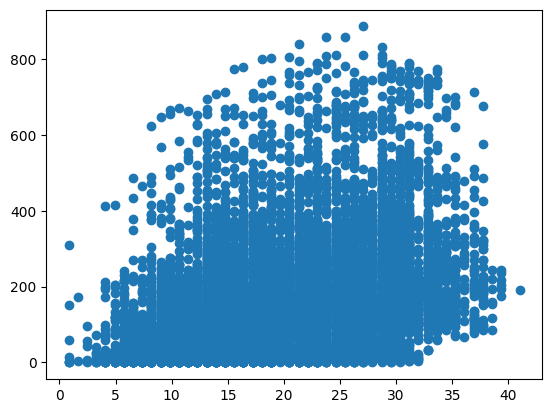

In [10]:
#plot a scattered plot with two variables to view the data 
plt.scatter(bike_sharing['temp'],bike_sharing['registered'])

Check the Features in the data frame to determine how to utilize feature engineering, dimensionality reduction and creation of dummy data if needed. 

In [4]:
#check the unique values for the the columns with dummy data to understand the data categories
bike_sharing['holiday'].unique()



array([0, 1])

In [5]:
bike_sharing['weather'].unique()


array([1, 2, 3, 4])

In [6]:
bike_sharing['season'].unique()


array([1, 2, 3, 4])

In [7]:
bike_sharing['workingday'].unique()

array([0, 1])

Next we would proceed to utilize dimensionality reduction, feature engineering and creation of dummy data to determine which variables affect the total rental. 


In [11]:
#create a month column and extract the months of rental from date time
bike_sharing['month'] = bike_sharing['datetime'].dt.month

In [12]:
#create a day column and extract the days of rental from date time
bike_sharing['day'] = bike_sharing['datetime'].dt.day

In [13]:
#preview your data 
bike_sharing

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,12,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,12,19
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,12,19
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,12,19


In [14]:
# Categorize the dummy data in the df
# Create function to classify amounts
def total_cat(x):
    if x >= 0 and x < 10:
        return '0-10'
    elif x >= 10 and x < 50:
        return '10-50'
    elif x >= 50 and x < 100:
        return '50-100'
    else:
        return '100+'

In [15]:
# Create new column to categorize the total rental using total_cat() 
bike_sharing['total_rental'] = bike_sharing['count'].apply(total_cat)

In [17]:
# Create function to classify good/bad days. This function takes in humdity and temperature
def good_bad(temp,hum):
    if temp > 25 and hum > 70:
        return 'too hot'
    elif temp <=25 and hum >= 50 and hum <= 70:
        return 'so so day'
    else:
        return 'good day'
    
# apply the function 
bike_sharing['day_type'] = bike_sharing.apply(lambda x: good_bad(x['temp'], x['humidity']), axis=1)

In [18]:
bike_sharing.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,total_rental,day_type
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1,10-50,good day
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,10-50,good day
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1,10-50,good day
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1,10-50,good day
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1,0-10,good day


In [19]:
# Rename season from the code direction
season_mapping = {1:'winter', 2:'spring', 3:'summer', 4:'fall'}
bike_sharing['season'] = bike_sharing['season'].map(season_mapping)

In [22]:
# Create season dummies and view it 
season_dummies = pd.get_dummies(bike_sharing['season'])
season_dummies.head()


,fall,spring,summer,winter
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [24]:
#merge the season dummies to the main data frame and view
bike_sharing = pd.concat([bike_sharing,season_dummies], axis=1)
bike_sharing.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,total_rental,day_type,fall,spring,summer,winter,fall,spring,summer,winter
0,2011-01-01 00:00:00,winter,0,0,1,9.84,14.395,81,0.0,3,...,10-50,good day,0,0,0,1,0,0,0,1
1,2011-01-01 01:00:00,winter,0,0,1,9.02,13.635,80,0.0,8,...,10-50,good day,0,0,0,1,0,0,0,1
2,2011-01-01 02:00:00,winter,0,0,1,9.02,13.635,80,0.0,5,...,10-50,good day,0,0,0,1,0,0,0,1
3,2011-01-01 03:00:00,winter,0,0,1,9.84,14.395,75,0.0,3,...,10-50,good day,0,0,0,1,0,0,0,1
4,2011-01-01 04:00:00,winter,0,0,1,9.84,14.395,75,0.0,0,...,0-10,good day,0,0,0,1,0,0,0,1


Once we have concluded dimensionality reduction, feature engineering and creation of dummy data, we would use an OLS model create a linear relationship if we wanted to predict the number of total rental (the count column) we would used the following independent variables  
1. what type of day type is it (bad day, good day, so so day)
2. Is it a holiday or not
3. Is it a working day or not
4. The amount of the windspeed
5. The rental month

In [25]:
#define your x variable (dependent) and y variable (independent)
x1 = bike_sharing['day_type']
x2 = bike_sharing['holiday']
x3 = bike_sharing['workingday']
x4 = bike_sharing['windspeed']
x5 = bike_sharing['month']
y = bike_sharing['count']

In [26]:
#import the model ols 
ols_model = ols("count ~ day_type + holiday + workingday + windspeed + month", data=bike_sharing).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     130.3
Date:                Sat, 08 Jul 2023   Prob (F-statistic):          6.72e-160
Time:                        03:28:30   Log-Likelihood:                -71668.
No. Observations:               10886   AIC:                         1.433e+05
Df Residuals:                   10879   BIC:                         1.434e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               107.97

In interpretting the results of an OLS model, count = 107.9704 + (-55.9061 * so so day) + (-64.6196 * too hot day) + ( -3.9451 * holiday) + (3.5065 * workingday) + ( 2.6169 * windspeed)+ ( 10.2367 * month). Further to this, the r-square is 0.067 which means the model makes a fair prediction but can really use a lot of improvement 